## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.10.0'

## 2- Loading Image

In [3]:
img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## 3- Sift Detector

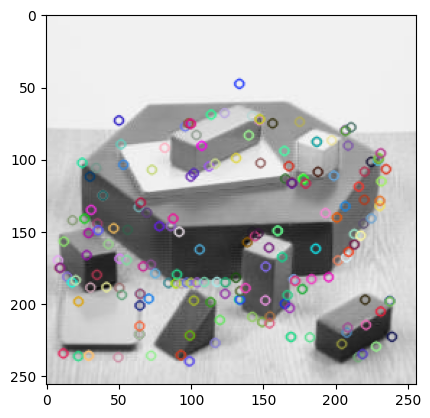

(<matplotlib.image.AxesImage at 0x2117ee818e0>, None)

In [4]:
sift = cv2.SIFT_create()

# key point
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(img,kp,img)

plt.imshow(img),plt.show()

## 4- Size and Direction

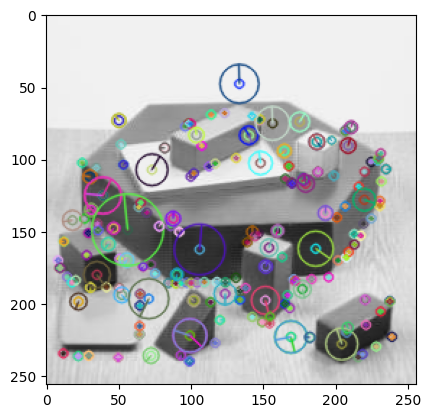

In [5]:
r = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(r)

## Example

### 1- Loading Images

(-0.5, 511.5, 383.5, -0.5)

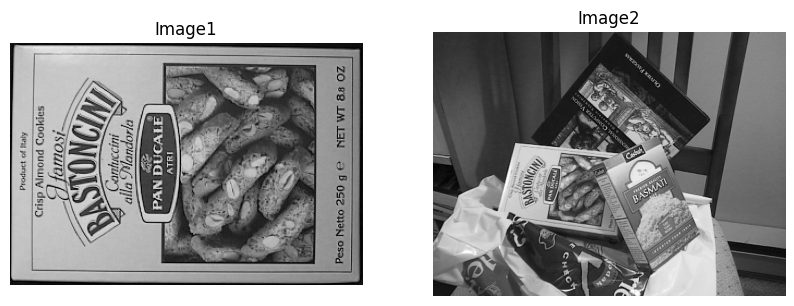

In [11]:
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png')

plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(img1[...,::-1]),plt.title('Image1')
plt.axis('off')
plt.subplot(122),plt.imshow(img2[...,::-1]),plt.title('Image2')
plt.axis('off')

### 2- Sift Detector

In [12]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [13]:
print(des1.shape)
print(des2.shape)

(604, 128)
(969, 128)


### 3- Plotting Keypoints

(-0.5, 323.5, 222.5, -0.5)

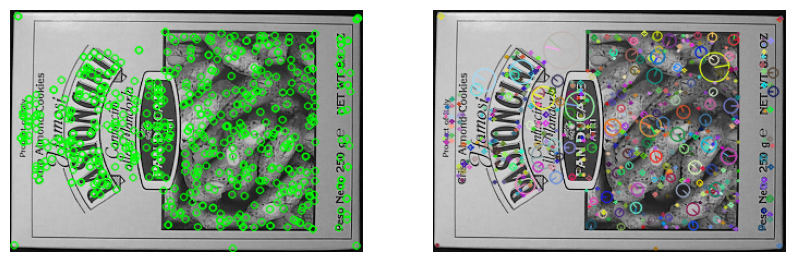

In [14]:
keypoints_without_size = np.copy(img1)
keypoints_with_size = np.copy(img1)


cv2.drawKeypoints(img1, kp1, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(keypoints_without_size[...,::-1])
plt.axis('off')
plt.subplot(122),plt.imshow(keypoints_with_size[...,::-1])
plt.axis('off')

### 4- Adaptation of Important Points

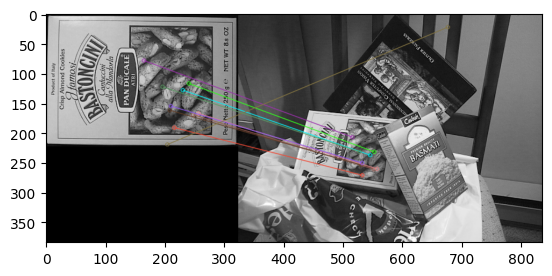


number of matching keypoints between the training and query images:  604


In [16]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()
print("\nnumber of matching keypoints between the training and query images: ", len(matches))